Chelsea Zackey
<br>CIS 5526
<br>12/7/2020

# Homework 7: Question 4

Generate N = 100 points from Gaussian distribution with mean 2 and standard deviation 2 (those values are the ground truth).

a. Plot a histogram of D. What is the mean and standard deviation on this sample?
<br>    **Soln**: The mean and standard deviation of this instance of our sample are 2.188194633481799 and 1.9543936399941857, respectively. 

b. Calculate the log-likelihood $P[D|\mu, \sigma]$ given (i) $\mu = 1, \; \sigma=2$, (ii) $\mu = 1.5, \; \sigma=2$, (iii) $\mu = 2, \; \sigma=2$. Which of those results in the highest log-likelihood?
<br>    **Soln**: For a given instance of sampling from the above distribution, we've obtained the following example results: 
        <br>(i) $P[D|\mu = 1, \sigma = 2] = -226.6018337150202$
        <br>(ii) $P[D|\mu = 1.5, \sigma = 2] = -214.87440079649778$
        <br>(iii) $P[D|\mu = 2, \sigma = 2] = -209.39696787797527$
        <br> From these results, we see that the case in which $\mu = 2, \text{ and }\sigma = 2$ yields the highest (least negative) log-likelihood out of the three. 

c. Find the maximum likelihood estimation of $\mu, \sigma$. How does this compare to the true parameters?
<br>    **Soln**: Having derived the formulas for the mean and standard deviation values maximizing the output of our likelihood estimator in class, we have shown that they are exactly equivalent to the formulas for sample mean and sample standard deviation, respectively. Hence, these values are equal to those reported for the sample in part (a), although a bit off by some tenths of a point from the true parameters used for the distribution (for this sample instance). 

d. Repeat the following procedure 200 times: (1) generate N = 100 points Gaussian distribution with mean 2 and standard deviation 2; (2) find the maximum likelihood estimates of $\mu, \sigma$. Plot the histogram of those 200 outcomes. What is the average of the estimates over 200 experiments? Now, repeat the same procedure, but generate N = 10 points in each iteration. How do the results change? What is the explanation for this (you can search the Web to answer)?
<br>    **Soln**: For a given instance of this procedure, the average mean and standard deviation found over all 200 outcomes for sample size N=100 are 1.99938577100976 and 1.9923045561098798, respectively. For samples of size N=10, the average mean and standard deviation are 1.9660926167354327 and 1.811563190479123, respectively. In fact, when repeating these procedures multiple times, we observe that the averages of these outcomes for when N=100 and N=10 do not demonstrate a pattern of significant difference (e.g., for one instance of the procedure, we obtained average sample means of 1.99 and 1.95 and average sample standard deviations of 1.85 and 1.82 for when N=100 and N=10, respectively), which may result from what we know from the Law of Large Numbers. In our case, the Law of Large Numbers suggests that because we have repeated the same two procedures over a relatively large number of iterations, taking the average of our results from both experiments will begin to yield results close to the true expectation of the distribution we're sampling from. Moreover, it's likely that the case in which N=100 appears to result in a slightly closer convergence to the true mean and standard deviation of the distribution when we consider the implications of the Law of Large Numbers for individual sampling instances (rather than comparing the two procedures along the horizon of 200 iterations). Indeed, when we take the average outcome of a random variable over a sample of size 100 as opposed to 10, we can expect the former to have a greater chance of converging to the true expected value of the underlying distribution. 

In [1]:
#Initialization code
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import math

N = 100 #sample size 
mu = 2 # mean
sig = 2 # standard deviation

def samp_mean(D):
# Calculates mean of sample stored in data set D
    return sum(D)/len(D)

def samp_std(D, mu):
#Calculates standard deviation of sample stored in data set D with mean mu
    sum = 0
    for d in D:
        sum += (d-mu)**2
    return math.sqrt(sum/len(D))
    

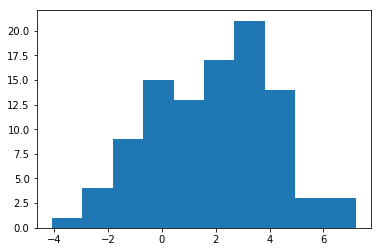

Calculated mean of sample: 1.8135937305395375
Calculated standard deviation of sample: 2.18515414660276


In [2]:
# Code for Part A
D = st.norm(loc=mu, scale=sig).rvs(size=N)
plt.hist(D)
plt.show()

smean = samp_mean(D)
sstd = samp_std(D, smean)
print("Calculated mean of sample: "+str(smean))
print("Calculated standard deviation of sample: "+str(sstd))


In [3]:
# Code for pt B

def log_likelihood(D, mu, sig):
# Calculates the log likelihood determined for the data set D given assumed mean mu and std sig
    sum = 0
    a = 1/(math.sqrt(2*math.pi)*sig)
    for d in D:
        b = ((d-mu)**2)/(2*(sig**2))
        sum += math.log(a)-b
    return sum

l = log_likelihood(D, 1, 2)
print("Calculated log-likelihood of sample with mean = 1, std = 2: ", str(l))
l = log_likelihood(D, 1.5, 2)
print("Calculated log-likelihood of sample with mean = 1.5, std = 2: ", str(l))
l = log_likelihood(D, 2, 2)
print("Calculated log-likelihood of sample with mean = 2, std = 2: ", str(l))

Calculated log-likelihood of sample with mean = 1, std = 2:  -229.16898891131777
Calculated log-likelihood of sample with mean = 1.5, std = 2:  -222.1240672795735
Calculated log-likelihood of sample with mean = 2, std = 2:  -221.3291456478293


In [4]:
#Code for pt C

# Mean & StD maximizing likelihood function are equivalent to sample mean & std
mlmean = samp_mean(D)
print("Mean value from Maximum Likelihood Estimator: ", str(mlmean))
print("Standard Deviation value from Maximum Likelihood Estimator: ", str(samp_std(D, mlmean)))

Mean value from Maximum Likelihood Estimator:  1.8135937305395375
Standard Deviation value from Maximum Likelihood Estimator:  2.18515414660276


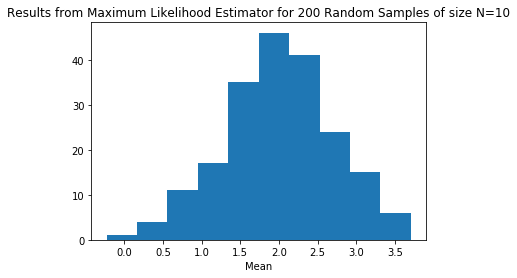

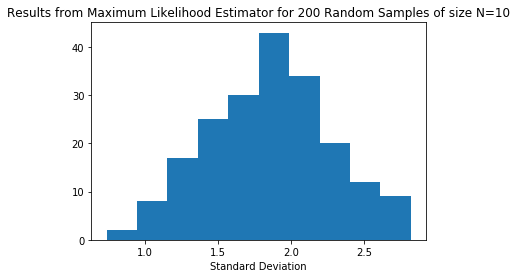

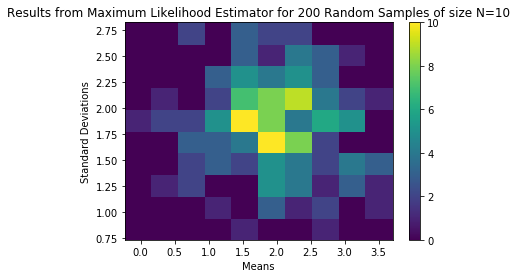

Average mean over all outcomes: 1.9972204836695695
Average std over all outcomes: 1.8554980090483215


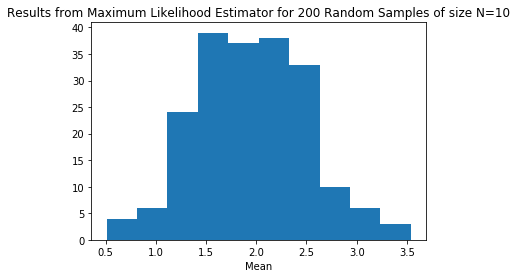

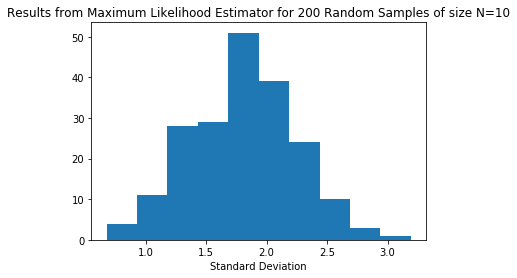

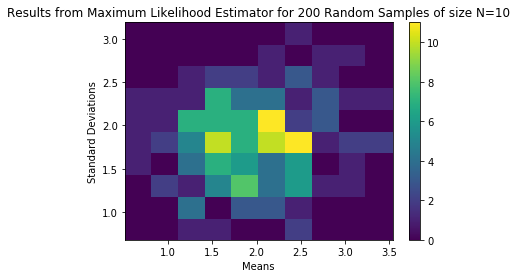

Average mean over all outcomes: 1.9497160257212511
Average std over all outcomes: 1.814309055745293


In [6]:
# Code for pt D
means = [] # container for results: mean
stds = [] # container for results: std
epochs = 200
# Generate random samples of size N=100 from N(2,2) distribution
for i in range(epochs): # repeat over 200 iterations
    D = st.norm(loc=mu, scale=sig).rvs(size=N) # Generate random sample
    means.append(samp_mean(D))
    stds.append(samp_std(D, means[i]))

#Generate plots
plt.title("Results from Maximum Likelihood Estimator for 200 Random Samples of size N="+str(N))
plt.hist(means, bins = 10) # histogram for determined means
plt.xlabel("Mean")
plt.show()
plt.hist(stds, bins = 10) # histogram for determined stds
plt.title("Results from Maximum Likelihood Estimator for 200 Random Samples of size N="+str(N))
plt.xlabel("Standard Deviation")
plt.show()
plt.hist2d(means, stds, bins = 10) # 2D histogram for determined results (means x stds)
plt.title("Results from Maximum Likelihood Estimator for 200 Random Samples of size N="+str(N))
plt.xlabel("Means")
plt.ylabel("Standard Deviations")
plt.colorbar()
plt.show()
print("Average mean over all outcomes: "+str(samp_mean(means)))
print("Average std over all outcomes: "+str(samp_mean(stds)))


# Repeat process for samples of size N = 10
N = 10
means.clear() # reinitialize container for results: mean
stds.clear() # reinitialize container for results: std

# Generate random samples of size N=100 from N(2,2) distribution
for i in range(epochs): # repeat over 200 iterations
    D = st.norm(loc=mu, scale=sig).rvs(size=N) # Generate random sample
    means.append(samp_mean(D))
    stds.append(samp_std(D, means[i]))

#Generate plots
plt.title("Results from Maximum Likelihood Estimator for 200 Random Samples of size N="+str(N))
plt.hist(means, bins =10) # histogram for determined means
plt.xlabel("Mean")
plt.show()
plt.hist(stds, bins = 10) # histogram for determined stds
plt.title("Results from Maximum Likelihood Estimator for 200 Random Samples of size N="+str(N))
plt.xlabel("Standard Deviation")
plt.show()
plt.hist2d(means, stds, bins = 10) # 2D histogram for determined results (means x stds)
plt.title("Results from Maximum Likelihood Estimator for 200 Random Samples of size N="+str(N))
plt.xlabel("Means")
plt.ylabel("Standard Deviations")
plt.colorbar()
plt.show()
print("Average mean over all outcomes: "+str(samp_mean(means)))
print("Average std over all outcomes: "+str(samp_mean(stds)))